# Introductory applied machine learning (INFR10069)
# Assignment 3 (Part B): Mini-Challenge [25%]

## Important Instructions

**It is important that you follow the instructions below to the letter - we will not be responsible for incorrect marking due to non-standard practices.**

1. <font color='red'>We have split Assignment 3 into two parts to make it easier for you to work on them separately and for the markers to give you feedback. This is part B of Assignment 3 - Part A is an introduction to Object Recognition. Both Assignments together are still worth 50% of CourseWork 2. **Remember to submit both notebooks (you can submit them separately).**</font>

1. You *MUST* have your environment set up as in the [README](https://github.com/michael-camilleri/IAML2018) and you *must activate this environment before running this notebook*:
```
source activate py3iaml
cd [DIRECTORY CONTAINING GIT REPOSITORY]
jupyter notebook
# Navigate to this file
```

1. Read the instructions carefully, especially where asked to name variables with a specific name. Wherever you are required to produce code you should use code cells, otherwise you should use markdown cells to report results and explain answers. In most cases we indicate the nature of answer we are expecting (code/text), and also provide the code/markdown cell where to put it

1. This part of the Assignment is the same for all students i.e. irrespective of whether you are taking the Level 10 version (INFR10069) or the Level-11 version of the course (INFR11182 and INFR11152).

1. The .csv files that you will be using are located at `./datasets` (i.e. use the `datasets` directory **adjacent** to this file).

1. In the textual answer, you are given a word-count limit of 600 words: exceeding this will lead to penalisation.

1. Make sure to distinguish between **attributes** (columns of the data) and **features** (which typically refers only to the independent variables, i.e. excluding the target variables).

1. Make sure to show **all** your code/working. 

1. Write readable code. While we do not expect you to follow [PEP8](https://www.python.org/dev/peps/pep-0008/) to the letter, the code should be adequately understandable, with plots/visualisations correctly labelled. **Do** use inline comments when doing something non-standard. When asked to present numerical values, make sure to represent real numbers in the appropriate precision to exemplify your answer. Marks *WILL* be deducted if the marker cannot understand your logic/results.

1. **Collaboration:** You may discuss the assignment with your colleagues, provided that the writing that you submit is entirely your own. That is, you must NOT borrow actual text or code from others. We ask that you provide a list of the people who you've had discussions with (if any). Please refer to the [Academic Misconduct](http://web.inf.ed.ac.uk/infweb/admin/policies/academic-misconduct) page for what consistutes a breach of the above.


### SUBMISSION Mechanics

**IMPORTANT:** You must submit this assignment by **Thursday 15/11/2018 at 16:00**. 

**Late submissions:** The policy stated in the School of Informatics is that normally you will not be allowed to submit coursework late. See the [ITO webpage](http://web.inf.ed.ac.uk/infweb/student-services/ito/admin/coursework-projects/late-coursework-extension-requests) for exceptions to this, e.g. in case of serious medical illness or serious personal problems.

**Resubmission:** If you submit your file(s) again, the previous submission is **overwritten**. We will mark the version that is in the submission folder at the deadline.

**N.B.**: This Assignment requires submitting **two files (electronically as described below)**:
 1. This Jupyter Notebook (Part B), *and*
 1. The Jupyter Notebook for Part A
 
All submissions happen electronically. To submit:

1. Fill out this notebook (as well as Part A), making sure to:
   1. save it with **all code/text and visualisations**: markers are NOT expected to run any cells,
   1. keep the name of the file **UNCHANGED**, *and*
   1. **keep the same structure**: retain the questions, **DO NOT** delete any cells and **avoid** adding unnecessary cells unless absolutely necessary, as this makes the job harder for the markers. This is especially important for the textual description and probability output (below).

1. Submit it using the `submit` functionality. To do this, you must be on a DICE environment. Open a Terminal, and:
   1. **On-Campus Students**: navigate to the location of this notebook and execute the following command:
   
      ```submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb```
      
   1. **Distance Learners:** These instructions also apply to those students who work on their own computer. First you need to copy your work onto DICE (so that you can use the `submit` command). For this, you can use `scp` or `rsync` (you may need to install these yourself). You can copy files to `student.ssh.inf.ed.ac.uk`, then ssh into it in order to submit. The following is an example. Replace entries in `[square brackets]` with your specific details: i.e. if your student number is for example s1234567, then `[YOUR USERNAME]` becomes `s1234567`.
   
    ```
    scp -r [FULL PATH TO 03_A_ObjectRecognition.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_A_ObjectRecognition.ipynb
    scp -r [FULL PATH TO 03_B_MiniChallenge.ipynb] [YOUR USERNAME]@student.ssh.inf.ed.ac.uk:03_B_MiniChallenge.ipynb
    ssh [YOUR USERNAME]@student.ssh.inf.ed.ac.uk
    ssh student.login
    submit iaml cw2 03_A_ObjectRecognition.ipynb 03_B_MiniChallenge.ipynb
    ```
    
   What actually happens in the background is that your file is placed in a folder available to markers. If you submit a file with the same name into the same location, **it will *overwrite* your previous submission**. You should receive an automatic email confirmation after submission.
  


### Marking Breakdown

The Level 10 and Level 11 points are marked out of different totals, however these are all normalised to 100%. Note that Part A (Object Recognition) is worth 75% of the total Mark for Assignment 3, while Part B (this notebook) is worth 25%. Keep this in mind when allocating time for this assignment.

**70-100%** results/answer correct plus extra achievement at understanding or analysis of results. Clear explanations, evidence of creative or deeper thought will contribute to a higher grade.

**60-69%** results/answer correct or nearly correct and well explained.

**50-59%** results/answer in right direction but significant errors.

**40-49%** some evidence that the student has gained some understanding, but not answered the questions
properly.

**0-39%** serious error or slack work.

Note that while this is not a programming assignment, in questions which involve visualisation of results and/or long cold snippets, some marks may be deducted if the code is not adequately readable.

## Imports

Use the cell below to include any imports you deem necessary.

In [1]:
# Nice Formatting within Jupyter Notebook
%matplotlib inline
from IPython.display import display # Allows multiple displays from a single code-cell

# System functionality
import sys
sys.path.append('..')

# Import Here any Additional modules you use. To import utilities we provide, use something like:
#   from utils.plotter import plot_hinton

# Your Code goes here:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import log_loss
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from itertools import combinations
from sklearn.neural_network import MLPClassifier

/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/anaconda3/envs/py3iaml/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Mini challenge

In this second part of the assignment we will have a mini object-recognition challenge. Using the same type of data as in Part A, you are asked to find the best classifier for the person/no person classification task. You can apply any preprocessing steps to the data that you think fit and employ any classifier you like (with the provision that you can explain what the classifier is/preprocessing steps are doing). You can also employ any lessons learnt during the course, either from previous Assignments, the Labs or the lecture material to try and squeeze out as much performance as you possibly can. The only restriction is that all steps must be performed in `Python` by using the `numpy`, `pandas` and `sklearn` packages. You can also make use of `matplotlib` and `seaborn` for visualisation.

### DataSet Description

The datasets we use here are similar in composition but not the same as the ones used in Part A: *it will be useful to revise the description in that notebook*. Specifically, you have access to three new datasets: a training set (`Images_C_Train.csv`), a validation set (`Images_C_Validate.csv`), and a test set (`Images_C_Test.csv`). You must use the former two for training and evaluating your models (as you see fit). As before, the full data-set has 520 attributes (dimensions). Of these you only have access to the 500 features (`dim1` through `dim500`) to test your model on: i.e. the test set does not have any of the class labels.

### Model Evaluation

Your results will be evaluated in terms of the logarithmic loss metric, specifically the [logloss](http://scikit-learn.org/0.19/modules/model_evaluation.html#log-loss) function from SKLearn. You should familiarise yourself with this. To estimate this metric you will need to provide probability outputs, as opposed to discrete predictions which we have used so far to compute classification accuracies. Most models in `sklearn` implement a `predict_proba()` method which returns the probabilities for each class. For instance, if your test set consists of `N` datapoints and there are `K` class-labels, the method will return an `N` x `K` matrix (with rows summing to 1).

### Submission and Scoring

This part of Assignment 3 carries 25% of the total marks. Within this, you will be scored on two criteria:
 1. 80% of the mark will depend on the thoroughness of the exploration of various approaches. This will be assessed through your code, as well as a brief description (<600 words) justifying the approaches you considered, your exploration pattern and your suggested final approach (and why you chose it).
 1. 20% of the mark will depend on the quality of your predictions: this will be evaluated based on the logarithmic loss metric.
Note here that just getting exceptional performance is not enough: in fact, you should focus more on analysing your results that just getting the best score!

You have to submit the following:
 1. **All Code-Cells** which show your **working** with necessary output/plots already generated.
 1. In **TEXT** cell `#ANSWER_TEXT#` you are to write your explanation (<600 words) as described above. Keep this brief and to the point. **Make sure** to keep the token `#ANSWER_TEXT#` as the first line of the cell!
 1. In **CODE** cell `#ANSWER_PROB#` you are to submit your predictions. To do this:
    1. Once you have chosen your favourite model (and pre-processing steps) apply it to the test-set and estimate the posterior proabilities for the data points in the test set.
    1. Store these probabilities in a 2D numpy array named `pred_probabilities`, with predictions along the rows i.e. each row should be a complete probability distribution over whether the image contains a person or not. Note that due to the encoding of the `is_person` class, the negative case (i.e. there is no person) comes first.
    1. Execute the `#ANSWER_PROB#` code cell, making sure to not change anything. This cell will do some checks to ensure that you are submitting the right shape of array.

You may create as many code cells as you need (within reason) for training your models, evaluating the data etc: however, the text cell `#ANSWER_TEXT#` and code-cell `#ANSWER_PROB#` showing your answers must be the last two cells in the notebook.

In [2]:
# This is where your working code should start. Feel free to add as many code-cells as necessary.
#  Make sure however that all working code cells come BEFORE the #ANSWER_TEXT# and #ANSWER_PROB#
#  cells below.

# Your Code goes here:
def preprocessing(images):
    columns = images.columns
    droped_columns = ['imgId']
    for c in columns:
        if c.startswith('is_') and c != 'is_person':
            droped_columns.append(c)
    images.drop(columns=droped_columns, inplace=True)
    return images

In [3]:
# Read data into memory.
images_t = preprocessing(pd.read_csv('datasets/Images_C_Train.csv'))
images_v = preprocessing(pd.read_csv('datasets/Images_C_Validate.csv'))
images_test = pd.read_csv('datasets/Images_C_Test.csv')

# Merge and redistribute training and validation data:
images_merge = pd.concat([images_t, images_v])
merge_train, merge_test = images_merge.drop(columns='is_person'), images_merge['is_person']
X_train, V_train, X_test, V_test = train_test_split(merge_train, merge_test, test_size=0.1, random_state=0)
y_train = images_test.drop(columns='is_person')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_train.describe()

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,...,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000,2903.000000
mean,0.029852,0.032861,0.031579,0.025314,0.029195,0.033837,0.034268,0.030922,0.033858,0.036886,...,0.033217,0.036041,0.029555,0.029471,0.026150,0.035003,0.034713,0.026396,0.031713,0.033277
std,0.426294,0.464431,0.371340,0.376980,0.402477,0.456456,0.471383,0.399494,0.447796,0.486298,...,0.447998,0.516711,0.366465,0.413467,0.362222,0.472809,0.464638,0.365454,0.450463,0.443633
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000852,0.000000,0.001488,0.000781,0.001116,0.001019,0.000340,0.000679,0.000744,0.001071,...,0.001019,0.000000,0.000679,0.000679,0.001860,0.001019,0.000744,0.001116,0.001019,0.001116
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001860,0.000781,0.001698,0.001698,0.002056,...,0.001860,0.000000,0.002717,0.001359,0.003289,0.001875,0.001953,0.002038,0.002038,0.002378
75%,0.002378,0.000910,0.006454,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003720,...,0.002991,0.000679,0.006793,0.002232,0.004877,0.003057,0.003736,0.003057,0.003397,0.004076
max,9.984000,9.122238,7.676800,9.695738,8.762671,9.489078,9.751526,8.691076,9.013933,9.602705,...,9.922150,9.673318,7.375434,9.672255,9.142031,9.299061,9.951019,9.036268,9.963328,9.505755


In [4]:
dim1 = X_train['dim1']
print ("99% of the data in feature dim1 are less than or equal to {:.5f}".format(dim1.quantile(0.99)))
print ("However, the maximum value for feature dim1 is {:.5f}".format(dim1.max()))
print ("This clearly exhibits the existence of outliers among data points.")

99% of the data in feature dim1 are less than or equal to 0.00595
However, the maximum value for feature dim1 is 9.98400
This clearly exhibits the existence of outliers among data points.


In [5]:
# Remove data points containing attribute values that lie one or more standard deviations away from the mean.
mean = X_train.describe().loc['mean']
std = X_train.describe().loc['std']

num_attributes = len(X_train.columns)
instances_as_outliers = []

for i in X_train.index:
    instance = X_train.loc[i]
    # If not all attributes are bounded by their standard deviations, this instance is an outlier.
    if sum(instance < (mean + std)) < num_attributes: 
        instances_as_outliers.append(i)

X_train = X_train.drop(index=instances_as_outliers, axis=0)
X_test = X_test.drop(index=instances_as_outliers)
display(X_train.describe())
print ("We have {} training instances left after cleaning.".format(X_train.shape[0]))

,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,dim10,...,dim491,dim492,dim493,dim494,dim495,dim496,dim497,dim498,dim499,dim500
count,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,...,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000,2880.000000
mean,0.001750,0.000719,0.004485,0.001901,0.002281,0.002188,0.001028,0.002462,0.002054,0.002690,...,0.002148,0.000568,0.004690,0.001557,0.003659,0.002194,0.002870,0.002195,0.002457,0.002993
std,0.001192,0.001341,0.003764,0.001370,0.001576,0.001682,0.000870,0.002830,0.001957,0.002277,...,0.001616,0.001182,0.005842,0.001208,0.002606,0.001630,0.003242,0.001388,0.001959,0.002655
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000836,0.000000,0.001488,0.000781,0.001116,0.001019,0.000340,0.000679,0.000744,0.001065,...,0.001019,0.000000,0.000679,0.000679,0.001860,0.001019,0.000728,0.001116,0.001019,0.001116
50%,0.001563,0.000340,0.003736,0.001698,0.002038,0.001860,0.000770,0.001698,0.001698,0.002038,...,0.001860,0.000000,0.002717,0.001359,0.003248,0.001860,0.001938,0.002038,0.002038,0.002378
75%,0.002378,0.000781,0.006454,0.002717,0.003057,0.003057,0.001488,0.003397,0.002717,0.003606,...,0.002976,0.000679,0.006709,0.002232,0.004836,0.003057,0.003736,0.003057,0.003397,0.004076
max,0.009851,0.022135,0.027514,0.010789,0.010417,0.021739,0.005774,0.029830,0.028372,0.020380,...,0.010870,0.021739,0.053329,0.010234,0.024457,0.013346,0.029225,0.008492,0.014509,0.028533


We have 2880 training instances left after cleaning.


In [6]:
# Standardise input features.
sscaler = StandardScaler().fit(X_train)
X_train, V_train, y_train = sscaler.transform(X_train), sscaler.transform(V_train), sscaler.transform(y_train)

# 5-fold Stratified Cross Validation:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

## Grid Search for the Pipeline of PCA and Logistic Regression with L2 Regularisation:

In [7]:
pipeline = Pipeline(steps=[('pca', PCA()), ('lgr', LogisticRegression())])

parameters = {
    'pca__n_components': [2, 5, 10, 20, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500],
    'lgr__C': np.logspace(-5, 5, 30)
}

gs_pca_lgr = GridSearchCV(pipeline, parameters, 'neg_log_loss', cv=skf)
gs_pca_lgr.fit(X_train, X_test)

# Transform training data using PCA with the optimal number of components found above:
pca = PCA(n_components=gs_pca_lgr.best_params_['pca__n_components'])
pca.fit(X_train)
X_train, V_train, y_train = pca.transform(X_train), pca.transform(V_train), pca.transform(y_train)

lgr = gs_pca_lgr.best_estimator_.named_steps['lgr']
V_pred = lgr.predict_proba(V_train)
lgr_score = log_loss(V_test, V_pred)

print ("The best log_loss for Logistic Regression is {:.4f}".format(lgr_score))
display(gs_pca_lgr.best_params_)

The best log_loss for Logistic Regression is 0.8145


{'lgr__C': 0.002592943797404667, 'pca__n_components': 450}

## Gaussian Naive Bayes:

In [8]:
gnb = GaussianNB()
gnb.fit(X_train, X_test)
V_pred = gnb.predict_proba(V_train)
gnb_score = log_loss(V_test, V_pred)

print ("The log_loss for Gaussian Naive Bayes is {:.4f}".format(gnb_score))

The log_loss for Gaussian Naive Bayes is 1.5633


## Grid Search for Support Vector Machine with rbf Kernel:

In [9]:
parameters = {
    'C': np.logspace(-5, 5, 10),
    'gamma': np.logspace(-5, 0, 5)
}

gs_svm_rbf = GridSearchCV(SVC(kernel='rbf', probability=True), parameters, 'neg_log_loss', cv=skf)
gs_svm_rbf.fit(X_train, X_test)

svm_rbf = gs_svm_rbf.best_estimator_
V_pred = svm_rbf.predict_proba(V_train)
svm_rbf_score = log_loss(V_test, V_pred)

print ("The best log_loss for Support Vector Machine with rbf kernel {:.4f}".format(svm_rbf_score))
display(gs_svm_rbf.best_params_)

The best log_loss for Support Vector Machine with rbf kernel 0.5657


{'C': 46.41588833612782, 'gamma': 0.0031622776601683794}

## Grid Search for Support Vector Machine with poly Kernel:

In [10]:
parameters = {
    'C': np.logspace(-5, 5, 10),
    'degree': np.arange(2, 7)
}

gs_svm_poly = GridSearchCV(SVC(kernel='poly', probability=True), parameters, 'neg_log_loss', cv=skf)
gs_svm_poly.fit(X_train, X_test)

svm_poly = gs_svm_poly.best_estimator_
V_pred = svm_poly.predict_proba(V_train)
svm_poly_score = log_loss(V_test, V_pred)

print ("The best log_loss for Support Vector Machine with poly kernel is {:.4f}".format(svm_poly_score))
display(gs_svm_poly.best_params_)

The best log_loss for Support Vector Machine with poly kernel is 0.7061


{'C': 3.593813663804626, 'degree': 3}

## Grid Search for K Nearest Neighbors:

In [11]:
parameters = {
    # Choose odd number for k since we have two classes:
    'n_neighbors': np.arange(1, 10, 2), 
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

gs_knn = GridSearchCV(KNeighborsClassifier(), parameters, 'neg_log_loss', cv=skf)
gs_knn.fit(X_train, X_test)

knn = gs_knn.best_estimator_
V_pred = knn.predict_proba(V_train)
knn_score = log_loss(V_test, V_pred)

print ("The best log_loss for K Nearest Neighbors is {:.4f}".format(knn_score))
display(gs_knn.best_params_)

The best log_loss for K Nearest Neighbors is 0.7770


{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

## Grid Search for Random Forest:

In [13]:
parameters = {
    'n_estimators': np.geomspace(1, 1024, num=11).astype(int),
    'max_depth': np.linspace(1, np.sqrt(pca.n_components_), 5).astype(int)
}

gs_rf = GridSearchCV(RandomForestClassifier(criterion='entropy'), parameters, 'neg_log_loss', cv=skf)
gs_rf.fit(X_train, X_test)

rf = gs_rf.best_estimator_
V_pred = rf.predict_proba(V_train)
rf_score = log_loss(V_test, V_pred)

print ("The best log_loss for Random Forest is {:.4f}".format(rf_score))
display(gs_rf.best_params_)

The best log_loss for Random Forest is 0.6405


{'max_depth': 16, 'n_estimators': 1024}

## Soft VotingClassifier with Weighted Combination of Above Models Except GNB:

In [14]:
clfs = [
    ('lgr', LogisticRegression(C=np.logspace(-5, 5, 30)[7])),
    ('svm_rbf', SVC(C=np.logspace(-5, 5, 10)[6], gamma=np.logspace(-5, 0, 5)[2], probability=True)),
    ('svm_poly', SVC(C=np.logspace(-5, 5, 10)[5], degree=np.arange(2, 7)[1], probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=np.arange(1, 10, 2)[4], weights='distance', p=np.arange(1, 6)[0])),
    ('rf', RandomForestClassifier(n_estimators=np.geomspace(1, 1024, num=11).astype(int)[10], max_depth=np.linspace(1, np.sqrt(pca.n_components_), 5).astype(int)[3]))
]

log_losses = np.array([
    lgr_score,
    svm_rbf_score,
    svm_poly_score,
    knn_score,
    rf_score
])

# Model with lower log_loss corresponds to higher performance and hence deserves more weight:
weights_reciprocal = np.reciprocal(log_losses)
weight_neg_exp = np.exp(-log_losses)

parameters = {
    'weights': [weights_reciprocal, weight_neg_exp]
}

gs_svc = GridSearchCV(VotingClassifier(clfs, 'soft'), parameters, 'neg_log_loss', cv=skf)
gs_svc.fit(X_train, X_test)

svc = gs_svc.best_estimator_
V_pred = svc.predict_proba(V_train)
svc_score = log_loss(V_test, V_pred)

print ("The best log_loss for Soft VotingClassifer is {:.4f}".format(svc_score))
display(gs_svc.best_params_)

The best log_loss for Soft VotingClassifer is 0.5797


{'weights': array([1.22780992, 1.76757818, 1.41627165, 1.28692757, 1.56123745])}

## Comparison Across Different Models:

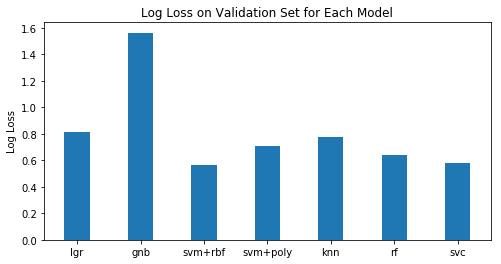

SVM+rbf is the best model to pick as it has the lowest log_loss.


In [15]:
scores = [lgr_score, gnb_score, svm_rbf_score, svm_poly_score, knn_score, rf_score, svc_score]
models = ['lgr', 'gnb', 'svm+rbf', 'svm+poly', 'knn', 'rf', 'svc']
x = np.arange(7)

plt.figure(figsize=(8, 4))
plt.bar(x, scores, width=0.4)
plt.ylabel('Log Loss')
plt.xticks(x, models)
plt.title('Log Loss on Validation Set for Each Model')
plt.show()

print ("SVM+rbf is the best model to pick as it has the lowest log_loss.")

## Fine-Tune SVM+rbf:

In [8]:
parameters = {
    'C': np.logspace(0.555, 2.778, 8),
    'gamma': np.logspace(-3.75, -1.25, 8)
}

gs_svm_rbf_finetune = GridSearchCV(SVC(kernel='rbf', probability=True), parameters, 'neg_log_loss', cv=skf)
gs_svm_rbf_finetune.fit(X_train, X_test)

svm_rbf_finetune = gs_svm_rbf_finetune.best_estimator_
V_pred = svm_rbf_finetune.predict_proba(V_train)
svm_rbf_finetune_score = log_loss(V_test, V_pred)

print ("The best log_loss score for fine-tuned Support Vector Machine with rbf kernel {:.4f}".format(svm_rbf_finetune_score))
display(gs_svm_rbf_finetune.best_params_)

The best log_loss score for fine-tuned Support Vector Machine with rbf kernel 0.5565


{'C': 66.87837533016615, 'gamma': 0.004770582696143932}

## Train the Fine-Tuned SVM+rbf with All Available Data and Give Test-Set Probabilities:

In [9]:
merge_train, merge_test = np.concatenate((X_train, V_train)), np.concatenate((X_test, V_test))

svm_rbf_final = SVC(C=np.logspace(0.555, 2.778, 8)[4], gamma=np.logspace(-3.75, -1.25, 8)[4], probability=True)
svm_rbf_final.fit(merge_train, merge_test)

pred_probabilities = svm_rbf_final.predict_proba(y_train)

#ANSWER_TEXT#

***Your answer goes here:***

First of all, I merged the training and validation data into a single dataset and redistributed that dataset as 90%/10% ratio to assign a larger portion to data used for training. Then, after inspecting the training data, I was certain that the dataset exhibited the existence of outliers among data points. Therefore, I removed data points containing attribute values that lie one or more standard deviations away from the mean and standardised all features by adjusting each feature to have 0 mean and 1 standard deviation, resulting in a cleaned and normalised dataset prepared for training. 

Before getting into the training stage, I created a StratifiedKFold object with k=5 in order to perform cross validation later during the training stage. The reason for using StratifiedKFold instead of plain KFold was to ensure that class distributions remain the same both in training folds and validation fold, otherwise we may get biased results due to the imbalanced distribution of classes among folds.

Afterwards, I had done a grid search for the pipeline of PCA and Logistic Regression with L2 Regularisaion in order to find the number of dominant components for training instances by means of extrinsic evaluation. Since PCA and Logistic Regression are both linear, the pipeline of them can be utilised to determine the best lower dimensional space with as much linear separability as possible to project data into. The reason for not chooing L1 regularisation was that L1 encourages sparcity and so can be treated as another way of feature selection. Therefore, we don't need to duplicate the selection process by having PCA and L1 simultaneously. 

Having found the optimal number of principal components for data to be projected into, PCA was then fitted to the training data and used to transform training data, validation data and test data by merging correlated dimensions and producing a new set of uncorrelated dimensions. Hence, all subsequent experiments were based on those PCA-transformed lower dimensional data points that were denser and had more independent attributes than before, which was especially beneficial for models like Naive Bayes and Decision Tree.

Subsequently, I fitted a Gaussian Naive Bayes model and ran through a series of grid searches involving non-linear models of SVM+rbf, SVM+poly, KNN, and Random Forest. In addition, with these models along with their optimal hyperparameters at hand, it was worth trying to aggregate them all (except Gaussian Naive Bayes for its obvious poor performance) into a soft voting classifer to mimic the idea of ensemble learning similar to Random Forest. Importantly, the weight for each model in the voting classifer was determined by either $\frac{1}{log\_loss}$ or $e^{-log\_loss}$ to reflect the fact that model with lower log_loss corresponds to higher performance and hence deserves more weight. Although it turned out that svm+rbf was the champion, soft voting classifer was still a good attempt and had the second best performance among all models.

In the end, I narrowed down the range of search space for hyperparameters and fine-tuned svm+rbf. Then I trained this model with all available data to exploit its full potential and give the test-set probabilities.

In [10]:
#ANSWER_PROB#
# Run this cell when you are ready to submit your test-set probabilities. This cell will generate some
# warning messages if something is not right: make sure to address them!

if pred_probabilities.shape != (1114, 2):
    print('Array is of incorrect shape. Rectify this before submitting.')
elif (pred_probabilities.sum(axis=1) != 1.0).all():
    print('Submitted values are not correct probabilities. Rectify this before submitting.')
else:
    for _prob in pred_probabilities:
        print('{:.8f}, {:.8f}'.format(_prob[0], _prob[1]))


0.74813722, 0.25186278
0.82180313, 0.17819687
0.40068735, 0.59931265
0.33766621, 0.66233379
0.66531710, 0.33468290
0.08225974, 0.91774026
0.21072190, 0.78927810
0.08717528, 0.91282472
0.92464258, 0.07535742
0.70685953, 0.29314047
0.54409130, 0.45590870
0.79944498, 0.20055502
0.56118141, 0.43881859
0.72483932, 0.27516068
0.00710420, 0.99289580
0.58663191, 0.41336809
0.12273502, 0.87726498
0.48513696, 0.51486304
0.77261885, 0.22738115
0.28662032, 0.71337968
0.79761244, 0.20238756
0.24629384, 0.75370616
0.74408717, 0.25591283
0.63913261, 0.36086739
0.65964587, 0.34035413
0.04255043, 0.95744957
0.27632503, 0.72367497
0.73679754, 0.26320246
0.17077819, 0.82922181
0.51001340, 0.48998660
0.89351085, 0.10648915
0.25924334, 0.74075666
0.85691617, 0.14308383
0.28992010, 0.71007990
0.78595593, 0.21404407
0.27667386, 0.72332614
0.11763400, 0.88236600
0.51063922, 0.48936078
0.79546560, 0.20453440
0.55033061, 0.44966939
0.84403073, 0.15596927
0.80488991, 0.19511009
0.60727134, 0.39272866
0.92317312,